The Boston house-price data of Harrison, D. and Rubinfeld, D.L. ‘Hedonic prices and the demand for clean air’, J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, ‘Regression diagnostics …’, Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression problems.

Load files

In [945]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read file

In [946]:
#CRIM per capita crime rate by town
#ZN proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS proportion of non-retail business acres per town
#CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX nitric oxides concentration (parts per 10 million)
#RM average number of rooms per dwellin
#AGE proportion of owner-occupied units built prior to 1940
#DIS weighted distances to five Boston employment centres
#RAD index of accessibility to radial highways
#TAX full-value property-tax rate per $10,000
#PTRATIO pupil-teacher ratio by town
#B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT % lower status of the population
#MEDV Median value of owner-occupied homes in $1000’s

In [947]:
# load datasets
train = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [948]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [949]:
train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Check null

In [950]:
train.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Analysis

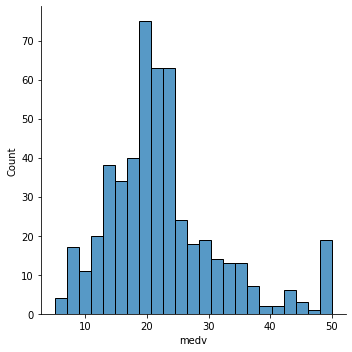

In [951]:
sns.displot(train['medv'])

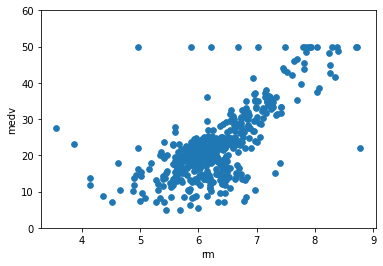

In [952]:
var = 'rm'
data = pd.concat([train['medv'], train[var]], axis=1)
data.plot.scatter(x=var, y='medv', ylim=(0,60), s=32);

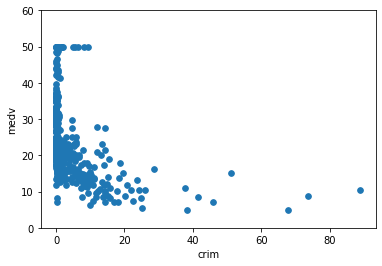

In [953]:
var = 'crim'
data = pd.concat([train['medv'], train[var]], axis=1)
data.plot.scatter(x=var, y='medv', ylim=(0,60), s=32);

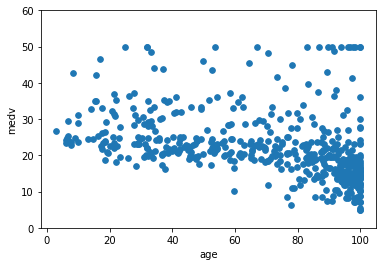

In [954]:
var = 'age'
data = pd.concat([train['medv'], train[var]], axis=1)
data.plot.scatter(x=var, y='medv', ylim=(0,60), s=32);

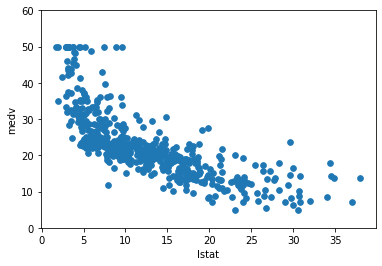

In [955]:
var = 'lstat'
data = pd.concat([train['medv'], train[var]], axis=1)
data.plot.scatter(x=var, y='medv', ylim=(0,60), s=32);

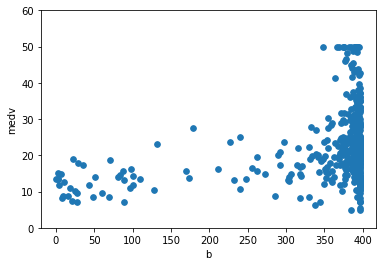

In [956]:
var = 'b'
data = pd.concat([train['medv'], train[var]], axis=1)
data.plot.scatter(x=var, y='medv', ylim=(0,60), s=32);

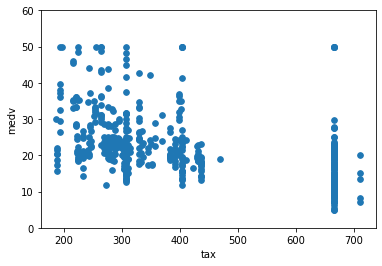

In [957]:
var = 'tax'
data = pd.concat([train['medv'], train[var]], axis=1)
data.plot.scatter(x=var, y='medv', ylim=(0,60), s=32);

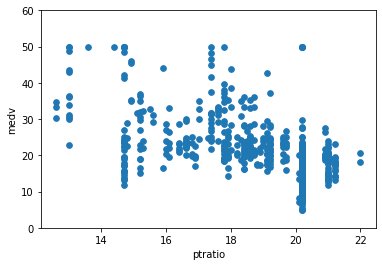

In [958]:
var = 'ptratio'
data = pd.concat([train['medv'], train[var]], axis=1)
data.plot.scatter(x=var, y='medv', ylim=(0,60), s=32);

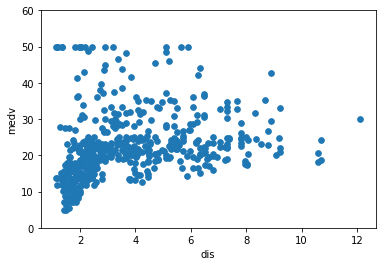

In [959]:
var = 'dis'
data = pd.concat([train['medv'], train[var]], axis=1)
data.plot.scatter(x=var, y='medv', ylim=(0,60), s=32);

Crime rate

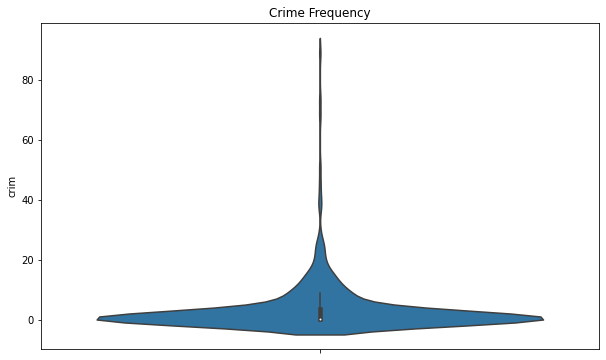

In [960]:
plt.figure(figsize=(10,6))
plt.title("Crime Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["crim"])
plt.show()

In [961]:
crime = train.crim.value_counts()
print("highest: ", crime.index[0], ", lowest: ", crime.index[-1])

highest:  14.3337 , lowest:  0.03578


Zone

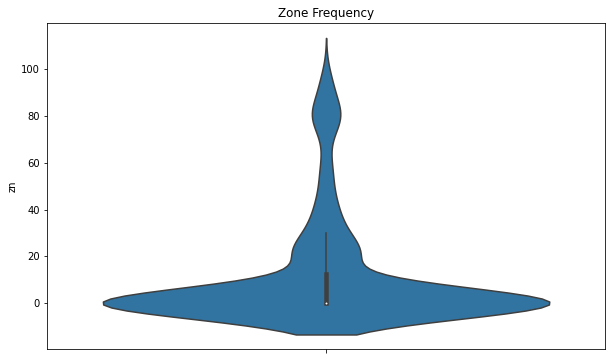

In [962]:
plt.figure(figsize=(10,6))
plt.title("Zone Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["zn"])
plt.show()

In [963]:
zone = train.zn.value_counts()
print("highest: ", zone.index[0], ", lowest: ", zone.index[-1])

highest:  0.0 , lowest:  18.0


Charles River

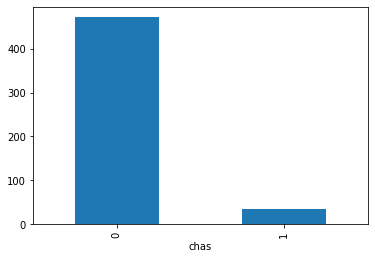

In [964]:
train.groupby('chas').medv.count().plot.bar(ylim=0)
plt.show()

In [965]:
charles = train.groupby('chas').medv.count()
charles

chas
0    471
1     35
Name: medv, dtype: int64

Industry

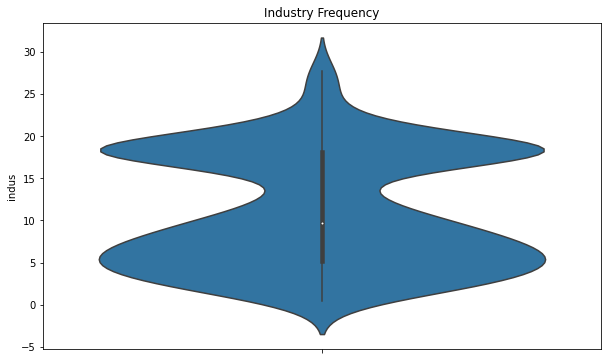

In [966]:
plt.figure(figsize=(10,6))
plt.title("Industry Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["indus"])
plt.show()

In [967]:
industry = train.indus.value_counts()
print("highest: ", industry.index[0], ", lowest: ", industry.index[-1])

highest:  18.1 , lowest:  4.0


Nitric oxide

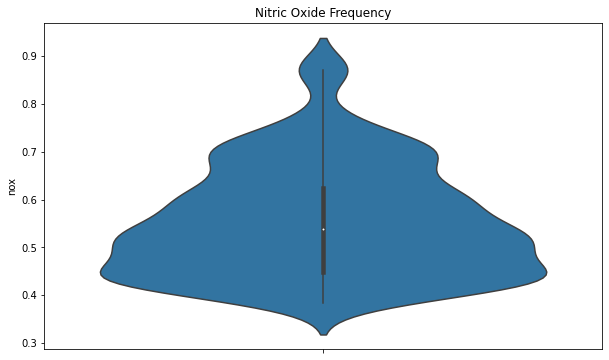

In [968]:
plt.figure(figsize=(10,6))
plt.title("Nitric Oxide Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["nox"])
plt.show()

In [969]:
nitric = train.nox.value_counts()
print("highest: ", nitric.index[0], ", lowest: ", nitric.index[-1])

highest:  0.5379999999999999 , lowest:  0.389


Average rooms per dwelling

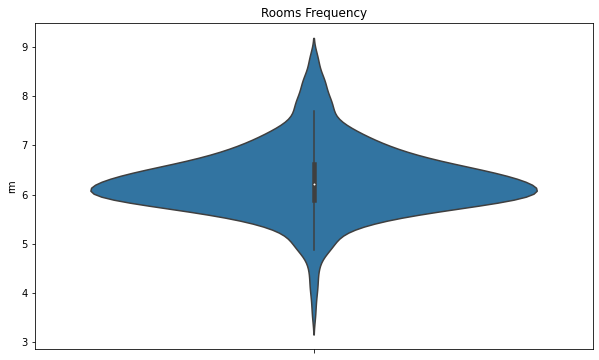

In [970]:
plt.figure(figsize=(10,6))
plt.title("Rooms Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["rm"])
plt.show()

In [971]:
room = train.rm.value_counts()
print("highest: ", room.index[0], ", lowest: ", room.index[-1])

highest:  6.405 , lowest:  6.625


Age of units built prior to 1940

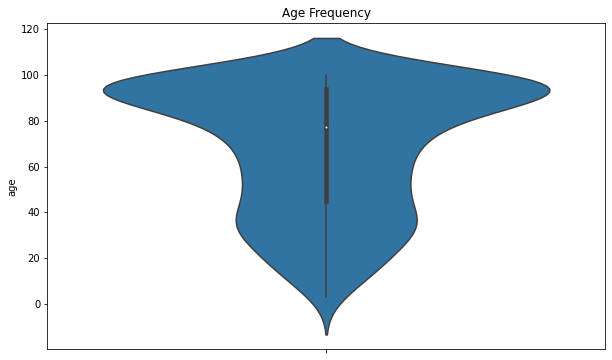

In [972]:
plt.figure(figsize=(10,6))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["age"])
plt.show()

In [973]:
age = train.age.value_counts()
print("highest: ", age.index[0], ", lowest: ", age.index[-1])

highest:  100.0 , lowest:  40.1


Distance to employment centre

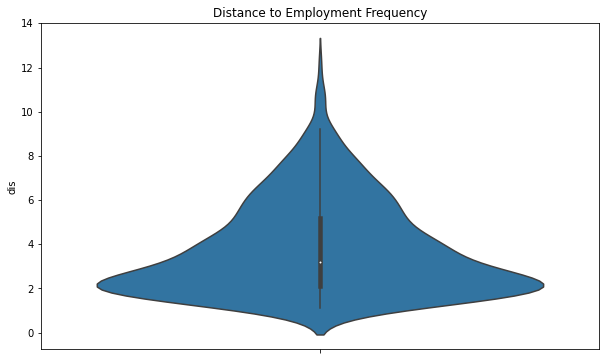

In [974]:
plt.figure(figsize=(10,6))
plt.title("Distance to Employment Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["dis"])
plt.show()

In [975]:
distance = train.dis.value_counts()
print("highest: ", distance.index[0], ", lowest: ", distance.index[-1])

highest:  3.4952 , lowest:  1.8125


Radial highways

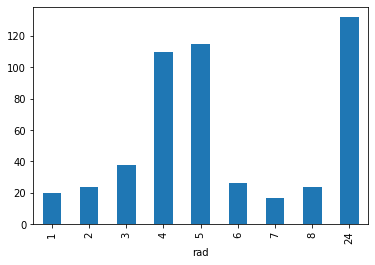

In [976]:
train.groupby('rad').medv.count().plot.bar(ylim=0)
plt.show()

In [977]:
highway = train.groupby('rad').medv.count()
highway

rad
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
Name: medv, dtype: int64

In [978]:
highway = train.rad.value_counts()
print("highest: ", highway.index[0], ", lowest: ", highway.index[-1])

highest:  24 , lowest:  7


Tax rate

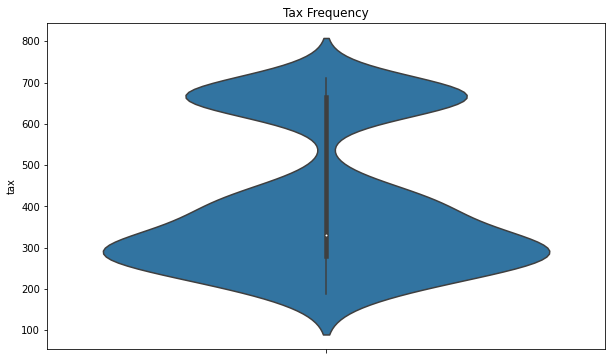

In [979]:
plt.figure(figsize=(10,6))
plt.title("Tax Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["tax"])
plt.show()

In [980]:
tax = train.tax.value_counts()
print("highest: ", tax.index[0], ", lowest: ", tax.index[-1])

highest:  666 , lowest:  285


Pupil teacher ratio

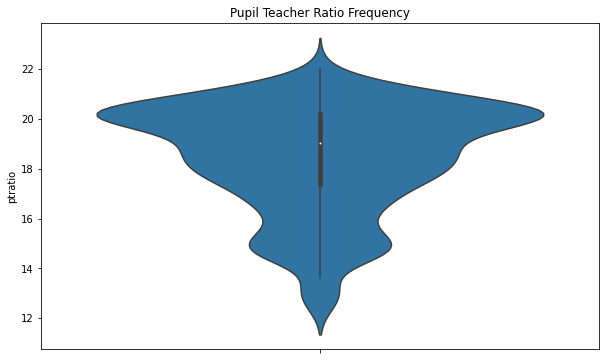

In [981]:
plt.figure(figsize=(10,6))
plt.title("Pupil Teacher Ratio Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["ptratio"])
plt.show()

In [982]:
teach = train.ptratio.value_counts()
print("highest: ", teach.index[0], ", lowest: ", teach.index[-1])

highest:  20.2 , lowest:  14.4


Blacks

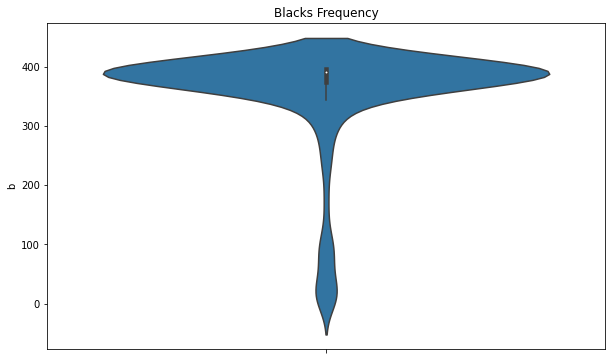

In [983]:
plt.figure(figsize=(10,6))
plt.title("Blacks Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["b"])
plt.show()

In [984]:
black = train.b.value_counts()
print("highest: ", black.index[0], ", lowest: ", black.index[-1])

highest:  396.9 , lowest:  390.5


Lower status 

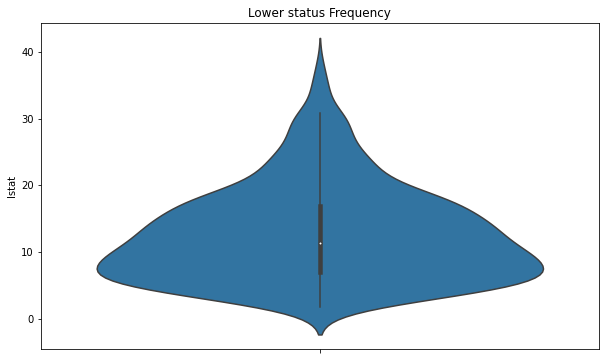

In [985]:
plt.figure(figsize=(10,6))
plt.title("Lower status Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["lstat"])
plt.show()

In [986]:
low = train.lstat.value_counts()
print("highest: ", low.index[0], ", lowest: ", low.index[-1])

highest:  14.1 , lowest:  29.05


Define X and y

In [987]:
y = train.medv
X = train.drop(['medv'], axis=1)

In [988]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [989]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

Normalize data

In [990]:
X = (X - X.min()) / (X.max() - X.min())
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


Split X

In [991]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, X_val.shape, y_train.shape,y_val.shape

((455, 13), (51, 13), (455,), (51,))

Define model

MLPR

In [992]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(50,), solver='adam', random_state=1, max_iter=4000, verbose=True).fit(X_train, y_train)
print(model.score(X_train, y_train))

Iteration 1, loss = 293.45700832
Iteration 2, loss = 291.33416640
Iteration 3, loss = 289.21003726
Iteration 4, loss = 287.08278433
Iteration 5, loss = 284.92154850
Iteration 6, loss = 282.75741738
Iteration 7, loss = 280.59369936
Iteration 8, loss = 278.39921897
Iteration 9, loss = 276.15669063
Iteration 10, loss = 273.90334440
Iteration 11, loss = 271.58014175
Iteration 12, loss = 269.24207075
Iteration 13, loss = 266.82384086
Iteration 14, loss = 264.33906765
Iteration 15, loss = 261.74854874
Iteration 16, loss = 259.04918561
Iteration 17, loss = 256.30550275
Iteration 18, loss = 253.47457716
Iteration 19, loss = 250.53032821
Iteration 20, loss = 247.47761441
Iteration 21, loss = 244.38537722
Iteration 22, loss = 241.17038281
Iteration 23, loss = 237.90277774
Iteration 24, loss = 234.54026435
Iteration 25, loss = 231.14000502
Iteration 26, loss = 227.67909346
Iteration 27, loss = 224.13089630
Iteration 28, loss = 220.57560477
Iteration 29, loss = 216.95997810
Iteration 30, loss = 21

Predict on validation set

In [993]:
y_pred = model.predict(X_val)
y_pred

array([32.09914343, 25.74837276, 19.49392563, 21.55209599, 20.71478382,
       18.84580509, 31.53148446, 18.42549246, 21.59356467, 24.47750169,
       32.24378912, 28.69202754, 19.34908828, 22.8416223 , 20.79612742,
       21.36178212, 13.68483882, 46.82643283, 26.01892362, 13.42492905,
       19.58991572, 15.92067233, 22.59133098, 24.75964461, 29.48396118,
       11.12040004, 16.81257606, 18.84265248, 39.72647888, 14.09064834,
       21.64751109, 17.04574932, 48.40682312, 16.23875882, 21.12066648,
       20.23039203, 15.22912781, 28.17262713, 12.04466199, 18.61210438,
       23.73318281, 22.7895884 , 29.28620956, 14.76025886, 17.09966984,
       11.63613801, 46.57736413, 16.82402553, 22.59651372, 19.41003923,
       26.21363576])

In [994]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, y_pred, squared=True)
rmse

9.749352886385472

In [995]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred}).reset_index()
df

,index,Actual,Predicted
0,307,28.2,32.099143
1,343,23.9,25.748373
2,47,16.6,19.493926
3,67,22.0,21.552096
4,362,20.8,20.714784
5,132,23.0,18.845805
6,292,27.9,31.531484
7,31,14.5,18.425492
8,218,21.5,21.593565
9,90,22.6,24.477502


Graph

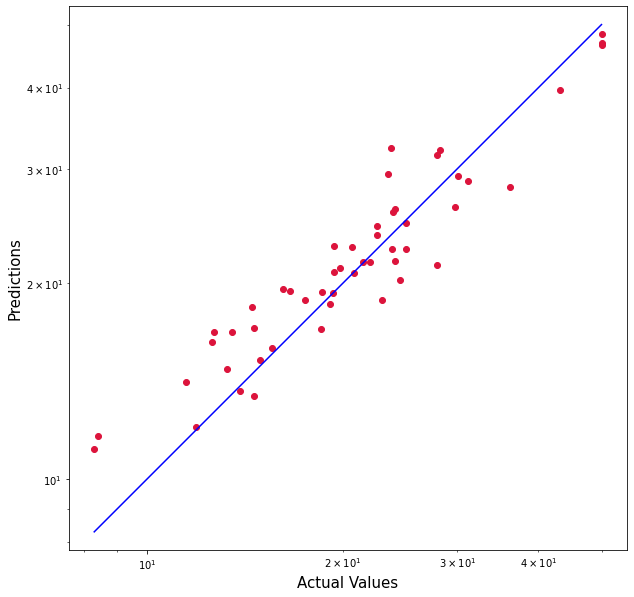

In [996]:
plt.figure(figsize=(10,10))
plt.scatter(y_val, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_val))
p2 = min(min(y_pred), min(y_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


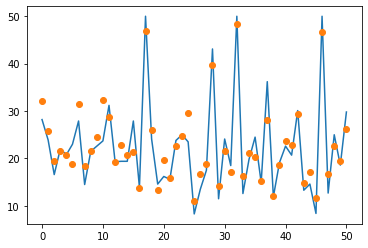

In [997]:
import matplotlib.pyplot as plt

plt.plot(df.Actual)
plt.plot(df.Predicted, 'o')
plt.show()